# Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided from Wei Shen where he gotten it from Mr.Afiq, who is the founder of Chili Lado.

We decided not to use all the datasets in this google drive, however, we only selected the datasets that are relevant to our analysis. The selected the Product Overview datasets from the Product Folder. 

At first we downloaded all the dataset into our local drive by using the dowload all button.

![DownloadAll](ChiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zipped file.

![ZippedFile](ChiliLadoData/ZippedFile.png)
![DownloadedFile](ChiliLadoData/DownloadedFile.png)

Based on our observation, the zip include the Product Overview dataset which is from May 2023 to September 2023. All of them has 22 Column, however it has different number of rows. May, June, July, August, September has 32,31,32,32,31 rows respectively. The column names are:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 files together, however we decided to do it with copy and paste instead of using python code because it only has 5 files. We use Ctrl+C to copy all the rows and use Ctrl+V to paste the copied rows into a new Excel File called MergedFile.xlsx.

![CopiedFile](ChiliLadoData/CopiedFile.png)

![PasteFile](ChiliLadoData/PasteFile.png)

We copied all five datasets into the MergedFile. However, for May 2023, we copy the whole file including the column names, while for other months,we only copied the data. We pasted the data beneath May 2023. We followed the same process for July 2023 and subsequent months.

![MayJune](ChiliLadoData/MayJune.png)

To check if the data is merged correctly, we calculate the total number of rows by adding the number of days in these 5 months and the row contains attribute name which is 31 + 30 + 31 + 31 + + 30 + 1 = 154, as our MergedFile has 154 rows means that we had merged it correctly.

To fulfill our objective, we require a different set of data sourced from the Dashboard of the year 2023.

![Dashboard2023](ChiliLadoData/Dashboard2023.png)

We get these following columns:

1. Numbers of buyers
2. Numbers of new buyers
3. Numbers of existing buyers

We replicate the procedure by copying the column and its data as the method above. Then, we paste this data into our recently created merged file.

![AddedColumn](ChiliLadoData/AddedColumn.png)

We found out that the figures in repeat purchase rate numbers are inaccurate. So, We perform data augmentation for two columns: the percentage of new buyers and the percentage of repeat buyers by using the data inside the dataset and Excel Function.

![NewCalculation](ChiliLadoData/NewCalculation.png)

![RepeatCalculation](ChiliLadoData/RepeatCalculation.png)

We use If in our calculation because if the number of buyer is equal to zero, it might have division by zero error. If the number of buyers equals zero, the output is set to zero, otherwise, the division operation proceeds.  We also convert our calculation to percentage by using this function.

![Percentage](ChiliLadoData/Percentage.png)

We decide to use all these steps in Excel rather in Python because it is faster than code, also we want to make direct changes to our dataset rather than temporary changes only.

We have 27 column and 154 rows inside the dataset. Now the data can be used for the next few steps.


# Step 2: Import the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Import the dataset

We import the dataset from our local directory. We created a file named ChiliLadoData and stored all the dataset and picture used there.

In [27]:
df = pd.read_excel('MergedFile.xlsx')

# Step 4: Clean the data by dentifying and handling missing value, redundancy and outliers

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](ChiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](ChiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing.

In [28]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df.isna().sum())

Find missing value of each column using isna()
Date                                     0
Product Visitors (Visit)                 0
Product Page Views                       0
Items Visited                            0
Product Bounce Visitors                  0
Product Bounce Rate                      0
Search Clicks                            0
Likes                                    0
Product Visitors (Add to Cart)           0
Units (Add to Cart)                      0
Conversion Rate (Add to Cart)            0
Buyers (Placed Order)                    0
Units (Placed Order)                     0
Items Placed                             0
Sales (Placed Order) (MYR)               0
Conversion Rate (Placed Order)           0
Buyers (Confirmed Order)                 0
Units (Confirmed Order)                  0
Items Confirmed                          0
Sales (Confirmed Order) (MYR)            0
Conversion Rate (Confirmed Order)        0
Conversion Rate (Placed to Confirmed)    0
Numbers

We found out that there are no row with missing value so we do not need to delete or drop any row

In [29]:
#Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df.duplicated().sum()
duplicate_columns = df.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on this, we found out that there are no duplicate data in this dataset so there are no redundancy


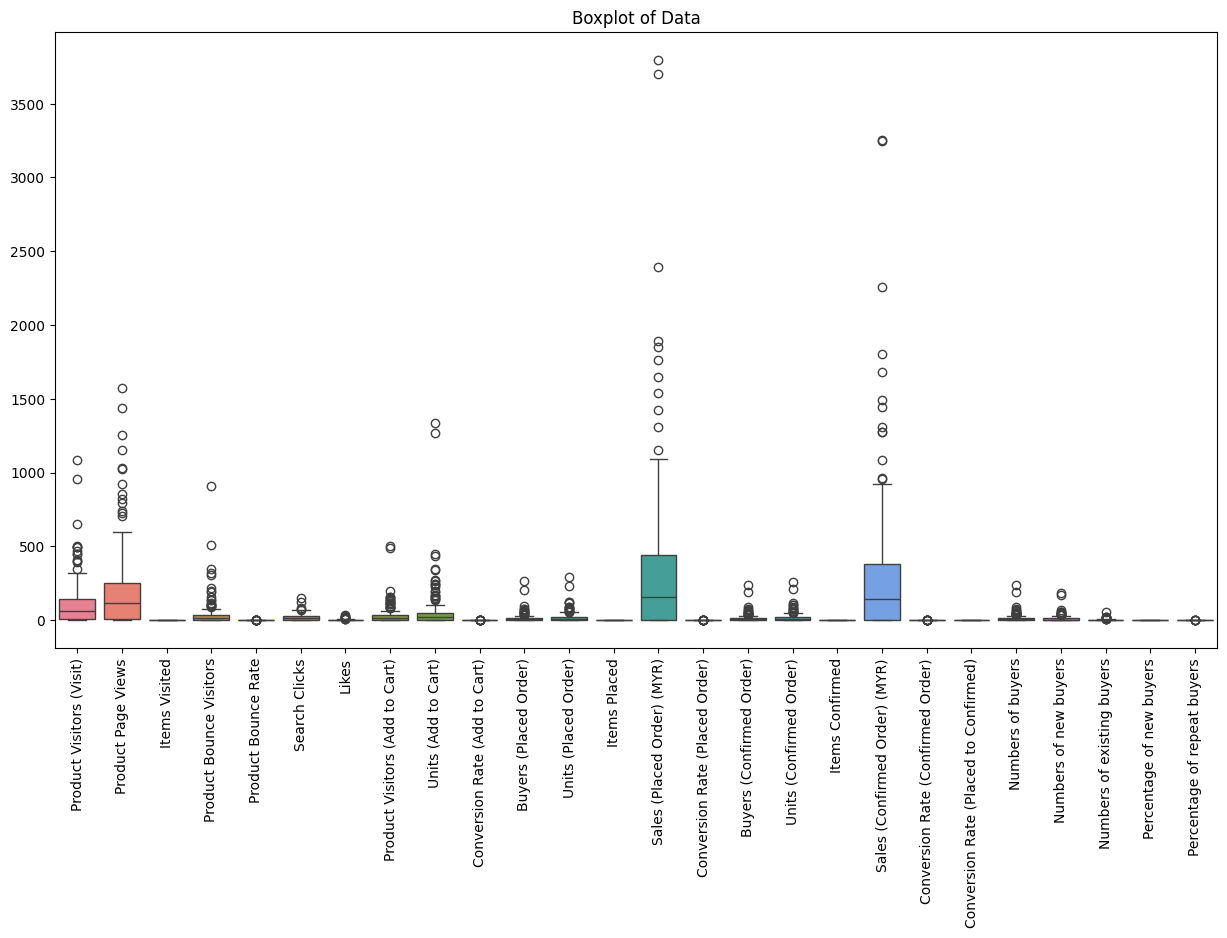

In [30]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf = df.drop(columns=['Date'])

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

This is the boxplot data graph before cleaning the outliers

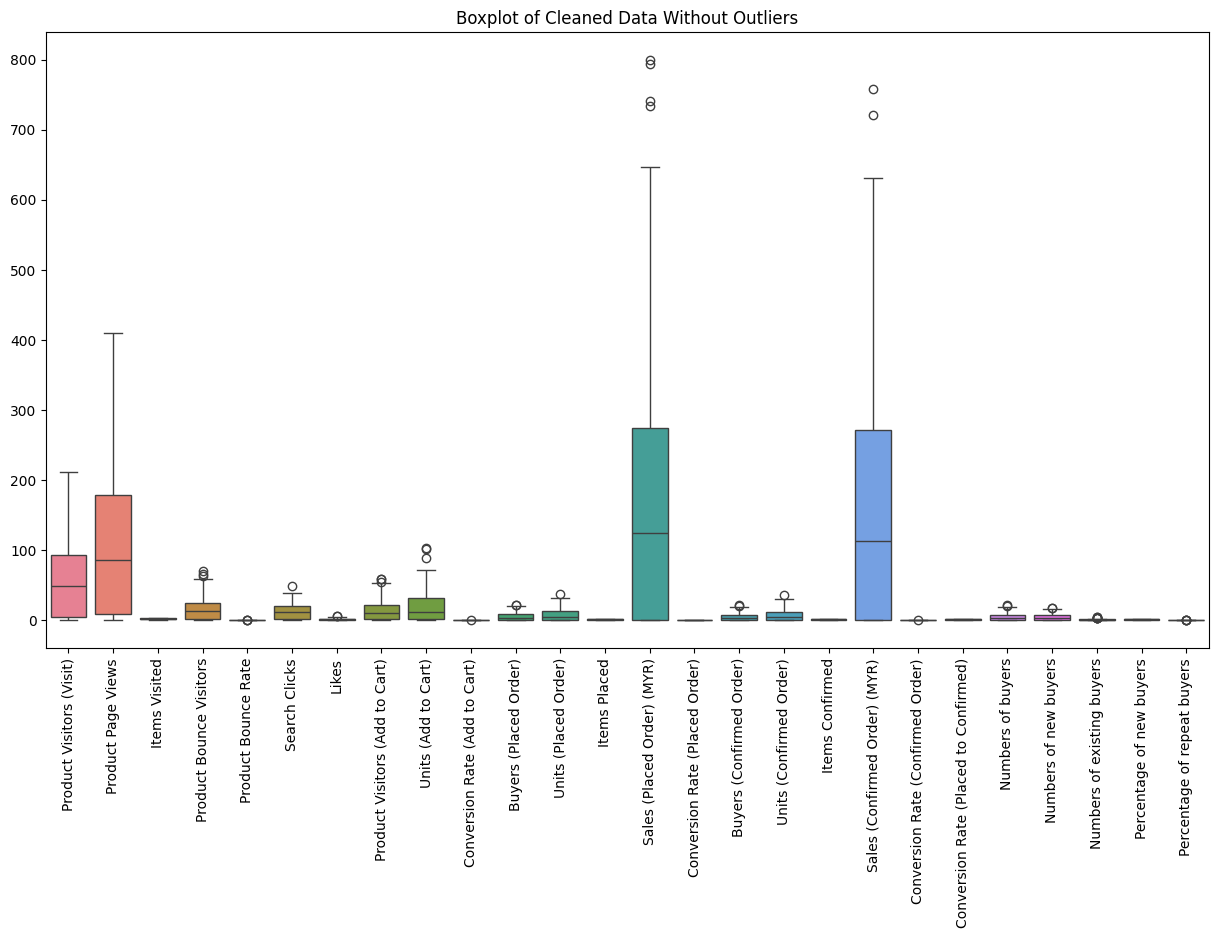

In [31]:
# Calculate the first quartile (Q1), third quartile (Q3) and interquantile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Identify and filter the outliers using the IQR method
outlier_condition = ((outliersdf < (Q1 - 1.5 * IQR)) | (outliersdf > (Q3 + 1.5 * IQR))).any(axis=1)

# Dataframe with outliers are removed
df = df[~outlier_condition]

# Create a boxplot to visualize the cleaned DataFrame without outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Cleaned Data Without Outliers")
plt.xticks(rotation=90)
plt.show()


This is the boxplot data graph after cleaning the outliers

In [32]:
# Display the cleaned data
display(df)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Product Bounce Visitors,Product Bounce Rate,Search Clicks,Likes,Product Visitors (Add to Cart),Units (Add to Cart),...,Units (Confirmed Order),Items Confirmed,Sales (Confirmed Order) (MYR),Conversion Rate (Confirmed Order),Conversion Rate (Placed to Confirmed),Numbers of buyers,Numbers of new buyers,Numbers of existing buyers,Percentage of new buyers,Percentage of repeat buyers
2,2023-05-03,4,7,1,1,0.2500,3,0,1,1,...,0,0,0.00,0.0000,0.0000,0,0,0,0.000000,0.000000
3,2023-05-04,1,3,1,0,0.0000,1,0,0,0,...,0,0,0.00,0.0000,0.0000,0,0,0,0.000000,0.000000
4,2023-05-05,3,10,1,0,0.0000,2,0,1,1,...,0,0,0.00,0.0000,0.0000,0,0,0,0.000000,0.000000
5,2023-05-06,4,4,1,1,0.2500,0,0,1,1,...,0,0,0.00,0.0000,0.0000,0,0,0,0.000000,0.000000
6,2023-05-07,4,3,1,1,0.2500,2,0,0,0,...,0,0,0.00,0.0000,0.0000,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-16,142,290,3,32,0.2254,49,0,53,63,...,10,1,193.54,0.0704,2.0000,10,9,1,0.900000,0.100000
139,2023-09-17,66,131,3,14,0.2121,25,3,17,21,...,5,1,112.70,0.0758,1.6667,5,5,0,1.000000,0.000000
140,2023-09-18,52,94,3,16,0.3077,17,0,8,8,...,2,1,63.77,0.0385,1.0000,2,1,1,0.500000,0.500000
141,2023-09-19,94,190,3,19,0.2021,32,0,24,27,...,8,1,217.13,0.0745,1.0000,7,6,1,0.857143,0.142857


# Step 5: Encode the categorical data

In [33]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes

print(df.dtypes)

Date                                     datetime64[ns]
Product Visitors (Visit)                          int64
Product Page Views                                int64
Items Visited                                     int64
Product Bounce Visitors                           int64
Product Bounce Rate                             float64
Search Clicks                                     int64
Likes                                             int64
Product Visitors (Add to Cart)                    int64
Units (Add to Cart)                               int64
Conversion Rate (Add to Cart)                   float64
Buyers (Placed Order)                             int64
Units (Placed Order)                              int64
Items Placed                                      int64
Sales (Placed Order) (MYR)                      float64
Conversion Rate (Placed Order)                  float64
Buyers (Confirmed Order)                          int64
Units (Confirmed Order)                         

We can see that all data is numerical data so we do not need to do any encoding

# Step 6: Feature Scaling
Now we should scale down the number of column to match the objective of our project. Also scale down the numbers 

In [34]:
df1 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Bounce Visitors', 'Product Bounce Rate','Likes', 'Product Visitors (Add to Cart)',
       'Units (Add to Cart)', 'Conversion Rate (Add to Cart)','Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed',
       'Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)','Buyers (Confirmed Order)', 'Units (Confirmed Order)',
       'Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)']

df1.drop(columns=drop_columns, inplace=True)

display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR),Numbers of buyers,Numbers of new buyers,Numbers of existing buyers,Percentage of new buyers,Percentage of repeat buyers
2,2023-05-03,4,7,1,3,0.00,0,0,0,0.000000,0.000000
3,2023-05-04,1,3,1,1,0.00,0,0,0,0.000000,0.000000
4,2023-05-05,3,10,1,2,0.00,0,0,0,0.000000,0.000000
5,2023-05-06,4,4,1,0,0.00,0,0,0,0.000000,0.000000
6,2023-05-07,4,3,1,2,0.00,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-16,142,290,3,49,193.54,10,9,1,0.900000,0.100000
139,2023-09-17,66,131,3,25,112.70,5,5,0,1.000000,0.000000
140,2023-09-18,52,94,3,17,63.77,2,1,1,0.500000,0.500000
141,2023-09-19,94,190,3,32,217.13,7,6,1,0.857143,0.142857


Do the MLR

In [35]:
#MLR CODE

New Buyer

In [36]:
#New Buyer Code

Existing Buyer

In [37]:
#Existing Buyer Code